# **Forelesning 2 - Matematikk, statistikk og bakgrunn for maskinlæring**

> Pure mathematics is, in its way, the poetry of logical ideas. - Albert Einstein





## Hvorfor?
For å forstå mange av de operasjonene vi skal gjøre trenger vi noe fundamental matematikk i bunn. Dette kommer vi bare til å skrape overflaten til, men likevel gi en introduksjon og intuisjon til hvorfor vi kan gjøre det vi kommer til å gjøre.

## **Fra sist gang**
Sist forelesning startet vi å diskutere hvordan vi bruker Python til enkle maskinlæringsmodeller, TensorFlow og teori bak dyplæring. Da brukes *tensorer* som input, som igjen gir ut et output. For dette har vi ofte behov for lineære transformasjoner. Tensorflow er nemlig utmerket for å gjøre lineær algebra, og dette er noe av grunn-steinen i maskinlæring, så derfor skal vi diskutere litt ulik bruk av TensorFlow til lineær algebra.

## Skalar addisjon og multiplikasjon
Hvis vi ønsker å definere en *skalar* eller *rank-0 tensor* bruker vi funksjonen *tf.constant()*. Mens andre ganger vil vi kanskje at disse skalar'ene skal være *trenbare* parametere, da bruker vi heller funksjonen *tf.Variable()*.

In [ ]:
import tensorflow as tf

# Her viser vi eksempel av tf.add() og tf.multiply() - for å summere og multiplisere konstanter
constant1 = tf.constant(2)
constant2 = tf.constant(3)

# Summere to skalarer (rank-0 tensorer)
sum = tf.add(constant1, constant2)

# Multiplisere to skalarer (rank-1 tensorer)
multiply = tf.multiply(constant1, constant2)

print(sum)
print(multiply)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


### Vi kan gjøre det samme for rank-1 tensorer (vektorer)


In [ ]:
# La oss gjøre det samme, men for rank-1 tensorer (vektorer)
vec1 = tf.constant([2, 3, 4, 5])
vec2 = tf.constant([3, 4, 5, 6])

sum = tf.add(vec1, vec2)
multiply = tf.multiply(vec1, vec2)

print(sum)
print(multiply)

tf.Tensor([ 5  7  9 11], shape=(4,), dtype=int32)
tf.Tensor([ 6 12 20 30], shape=(4,), dtype=int32)


In [ ]:
# Vi kan også gjøre addisjon/multiplikasjon ved det som kalles "operator overloading" - og få samme resultat
print(vec1 + vec2)
print(vec1 * vec2)

tf.Tensor([ 5  7  9 11], shape=(4,), dtype=int32)
tf.Tensor([ 6 12 20 30], shape=(4,), dtype=int32)


## **Multiplikasjon av tensorer**
Over så vi på tensor addisjon og multiplikasjon, av skalarer/vektorer av samme dimensjon. Men nå skal vi tre ulike typer av tensor-multiplikasjon.

1. **Elementvis multiplikasjon**
2. **Dot produktet**
3. **Matrise multiplikasjon**

## 1. Elementvis multiplikasjon
Her er det et **krav** at tensorene har samme dimensjoner. For eksempel kan vi gjøre følgende:

$$\begin{bmatrix}
a_{00} & a_{01} \\
a_{10} & a_{11}
\end{bmatrix}
\odot
\begin{bmatrix}
b_{00} & b_{01} \\
b_{10} & b_{11}
\end{bmatrix}
=
\begin{bmatrix}
a_{00} * b_{00} & a_{01} * b_{01} \\
a_{10} * b_{10} & a_{11} * b_{11}
\end{bmatrix}
=
\begin{bmatrix}
c_{00} & c_{01} \\
c_{10} & c_{11}
\end{bmatrix}$$

hvor $\odot$ betyr *elementvis* multiplikasjon.


In [ ]:
# Dette kan eksemplifiseres på følgende vis
A_matrix = tf.constant([[1, 2], [3, 4]])
B_matrix = tf.constant([[5, 6], [7, 8]])

mult = tf.multiply(A_matrix, B_matrix)
print(mult)

tf.Tensor(
[[ 5 12]
 [21 32]], shape=(2, 2), dtype=int32)


In [ ]:
# Her kan vi også bruke "operator overloading"
print(A_matrix * B_matrix)

tf.Tensor(
[[ 5 12]
 [21 32]], shape=(2, 2), dtype=int32)


## 2. Dot produktet
*Dot-produktet* kan man regne ut mellom to vektorer, kall disse $A$ og $B$, med samme antall elementer $n$. Da er dot-produktet summen av produktene til de korresponderende elementene i $A$ og $B$. Dette kan vi skrive mer matematisk.

La $A=[a_0, a_1, \ldots, a_n]$ og $B=[b_0, b_1, \ldots, b_n]$, da er dot-produktet

\begin{align*}
c &= A \cdot B \\
c &= \sum_{i=0}^n a_i b_i
\end{align*}

In [ ]:
# La oss bruke 'tensordot' for å regne ut dot-produktet mellom A og B

# Velger to vilkårlig A og B vektorer.
A = tf.constant([1, 2, 3])
B = tf.constant([4, 5, 6])

# tf.tensordot brukes for å regne ut dot-produktet.
C = tf.tensordot(A, B, axes=1)
print(C)

# Hvis dere kun vil ha numpy argumentet (selve tall-verdien av dotproduktet)
print(C.numpy())

tf.Tensor(32, shape=(), dtype=int32)
32


## 3. Matrisemultiplikasjon
*Matrisemultiplikasjon* gir kun mening ved å diskutere rank-2 tensorer (matriser). Selv om vi kan gjøre matrisemultiplikasjon av rank-k tensorer ($k>2$), så kalles det "batch" matrise multiplikasjon. Dette kan brukes i convolutional neural networks, som brukes mye i maskinlæring når det gjelder bilder. Vi vil se litt på dette senere i kurset, men er ikke noe vi kommer til å bruke alt for mye tid på.

Fra lineær algebra og matematikken husker vi (forhåpentligvis) at hvis vi skal matrise-multiplisere $A$ med $B$, må $A$ har like mange kolonner som $B$ har rader.

Da kan vi skrive matrise $A_{i*}$ for ha ha $i$ antall rader og $*$ (vilkårlig) antall kolonner. $B_{*j}$ har $*$ rader (samme som antall kolonner i $A$) og $j$ kolonner. Da er produktet av disse to

$$C_{ij}=A_{i*} \cdot B_{*j}$$

eksempelvis gjennomføres det slik
$$
C = \begin{bmatrix}
a_{00} & a_{01} \\
a_{10} & a_{11}
\end{bmatrix}
\cdot
\begin{bmatrix}
b_{00} & b_{01} \\
b_{10} & b_{11}
\end{bmatrix}
= \begin{bmatrix}
a_{00}b_{00} + a_{01}b_{10} & a_{00}b_{01} + a_{01}b_{11} \\
a_{10}b_{00} + a_{11}b_{10} & a_{10}b_{01} + a_{11}b_{11}
\end{bmatrix}
$$

In [ ]:
# Dette kan vi gjøre med kode

# Definerer to matriser
A = tf.constant([[1, 2,], [3, 4], [9, 10]])
B = tf.constant([[5, 6], [7, 8]])

# tf.matmul gjennomfører matrise multiplikasjonen
C = tf.matmul(A, B)
print(C)
print(C.shape)

tf.Tensor(
[[ 19  22]
 [ 43  50]
 [115 134]], shape=(3, 2), dtype=int32)
(3, 2)


# **Nevrale nettverk - grunnsteinen i dyplæring**


## **Arkitektur**
Nevrale nettverk er en sentral komponent i dyplæring og består av flere lag med noder (nevroner) som er organisert i en bestemt struktur. Arkitekturen til et nevralt nettverk bestemmer hvordan data blir behandlet og lært av modellen. Her er de viktigste komponentene:

1. **Input lag**:
Dette er det første laget i et nevralt nettverk, hvor dataene blir matet inn i nettverket. Hvert nevron i inngangslaget representerer en funksjon eller et trekk ved de opprinnelige dataene. For eksempel, i et bildeklassifikasjonsproblem kan hvert nevron representere en pikselverdi.

2. **Skjulte lag (Hidden Layers)**:
Disse lagene ligger mellom inngangslaget og utgangslaget og består av noder som gjør beregninger basert på vekter og aktiveringsfunksjoner. Skjulte lag er ansvarlige for å lære representasjoner og mønstre i dataene. Antall skjulte lag og noder i hvert lag er en viktig del av arkitekturen og kan variere avhengig av problemet og nettverkets kompleksitet.

3. **Utgangslag (Output Layer)**:
Dette laget gir det endelige resultatet av nettverkets beregninger. I en klassifikasjonsoppgave vil utgangslaget typisk bruke en aktiveringsfunksjon som Softmax for å gi en sannsynlighetsfordeling over de forskjellige klassene. I en regresjonsoppgave kan utgangslaget være en enkelt neuron som gir en kontinuerlig verdi.

![Nevralt nettverk](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*_SH7tsNDTkGXWtZb.png)

4. **Vekter og biaser**:
Hver forbindelse mellom noder i påfølgende lag har tilknyttede vekter, og hver node kan ha en bias. Vektene og biasene justeres under treningsprosessen for å minimere forskjellen mellom de predikerte verdiene og de faktiske verdiene.

5. **Feedforward og Backpropagation**:
* *Feedforward*: Data sendes fra inngangslaget til utgangslaget gjennom de skjulte lagene. Hver node i ett lag beregner en lineær kombinasjon av inngangene (vektede summer) og bruker en aktiveringsfunksjon for å bestemme utgangen.
* *Backpropagation*: En algoritme for å justere vektene i nettverket. Den beregner gradienten av tapet med hensyn til vektene og bruker denne informasjonen til å oppdatere vektene for å minimere tapet.
6. **Aktiveringsfunksjoner**:
Aktiveringsfunksjoner introduserer ikke-linearitet i nettverket, noe som gjør det mulig for nettverket å lære komplekse sammenhenger. De bestemmer hvordan signalene fra en node skal transformeres før de sendes til neste lag. Vanlige aktiveringsfunksjoner inkluderer Sigmoid, Tanh, ReLU, Leaky ReLU og Softmax, som er valgt basert på oppgaven og nettverkets krav.
(Mer om disse lenger ned)

7. **Loss-funksjoner**:
Loss-funksjoner brukes til å evaluere hvor godt nettverket presterer. De beregner forskjellen mellom de predikerte verdiene og de faktiske verdiene. Valg av loss-funksjon er kritisk og avhenger av typen problem som skal løses, som regresjon eller klassifikasjon. Vanlige loss-funksjoner inkluderer Mean Squared Error (MSE), Binary Cross-Entropy, Categorical Cross-Entropy, Hinge Loss og Huber Loss.
(Mer om disse lenger ned)

Arkitekturen til et nevralt nettverk kan variere betydelig avhengig av oppgaven. For eksempel kan et enkelt nevralt nettverk (også kjent som et enkelt lag) være tilstrekkelig for enkle problemer, mens dype nettverk med mange skjulte lag (dype nevrale nettverk) kan være nødvendig for mer komplekse oppgaver som bilde- eller talegjenkjenning. Valget av arkitektur, aktiveringsfunksjoner og loss-funksjoner spiller en kritisk rolle i hvor godt nettverket lærer og generaliserer fra dataene.

---

## **Aktiveringsfunksjon**
Aktiveringsfunksjoner i nevrale nettverk er avgjørende fordi de introduserer ikke-linearitet i modellen, noe som gjør det mulig for nettverket å lære komplekse mønstre. Uten aktiveringsfunksjoner ville et nevralt nettverk bare være en lineær kombinasjon av inngangene, uansett hvor mange lag det har. Aktiveringsfunksjoner gjør at nettverket kan representere ikke-lineære sammenhenger.

### **Vanlige aktiveringsfunksjoner**
1. **Sigmoid**
* Formel: $\sigma(x) = \frac{1}{1 + e^{-x}}$
* Output: Verdier mellom $0$ og $1$.
* Bruksområde: Brukes ofte i utgangen av binære klassifikasjonsproblemer.
* Fordel: Kan tolkes som sannsynligheter.
* Ulempe: Lider av vanishing gradient-problemet; gradienten kan bli veldig liten for store positive eller negative inputverdier, noe som gjør læringen treg.
---
2. **Tanh (Hyperbolsk Tangens)**
* Formel: $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
* Output: Verdier mellom $-1$ og $1$.
* Bruksområde: Brukes ofte i skjulte lag i nevrale nettverk.
* Fordel: Sentraliserer data rundt $0$, noe som kan føre til raskere læring enn sigmoid.
* Ulempe: Lider også av vanishing gradient-problemet.
---
3. **ReLU (Rectified Linear Unit)**
* Formel: $\text{ReLU}(x) = \max(0, x)$
* Bruksområde: Svært populær i skjulte lag i moderne nevrale nettverk.
* Fordel: Enkel og effektiv, unngår vanishing gradient-problemet for positive verdier.
* Ulempe: Dying ReLU-problemet; noen noder kan "dø" hvis de bare gir $0$ som output, noe som kan hindre læring.
---
4. **Leaky ReLU**
* Formel: $\text{Leaky ReLU}(x) =
\begin{cases}
x & \text{hvis } x > 0 \\
\alpha x & \text{hvis } x \leq 0
\end{cases}$
- Her er ofte $α$ en liten konstant (typisk 0.01).
* Bruksområde: Løser døde noder-problemet ved å gi en liten gradient også for negative verdier.
* Fordel: Forbedrer påliteligheten sammenlignet med ReLU.
---
5. **Softmax**
* Formel: $\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$
* Konverterer en vektor av $n$ reelle tall til en sannsynlighetsfordeling med $n$ mulige utfall.
* Output: En sannsynlighetsfordeling der summen av outputene er $1$.
* Bruksområde: Brukes i det siste laget i multiklasse klassifikasjon.
* Fordel: Gir en klar sannsynlighetsfordeling, noe som er nyttig for klassifikasjonsoppgaver.
---
### **Hvorfor er disse så viktige?**
* Uten aktiveringsfunksjon er nevrale nettverk bare en lineær modell, da disse fanger opp *ikke-lineære* sammenhenger i dataen.
* Det er fordi det bestemmer om et *nevron* i nettverket aktiveres eller ikke, avhengig av det nevroner får som input (data, vekter).



## **La oss visualisere noen av aktiveringsfunksjonene**

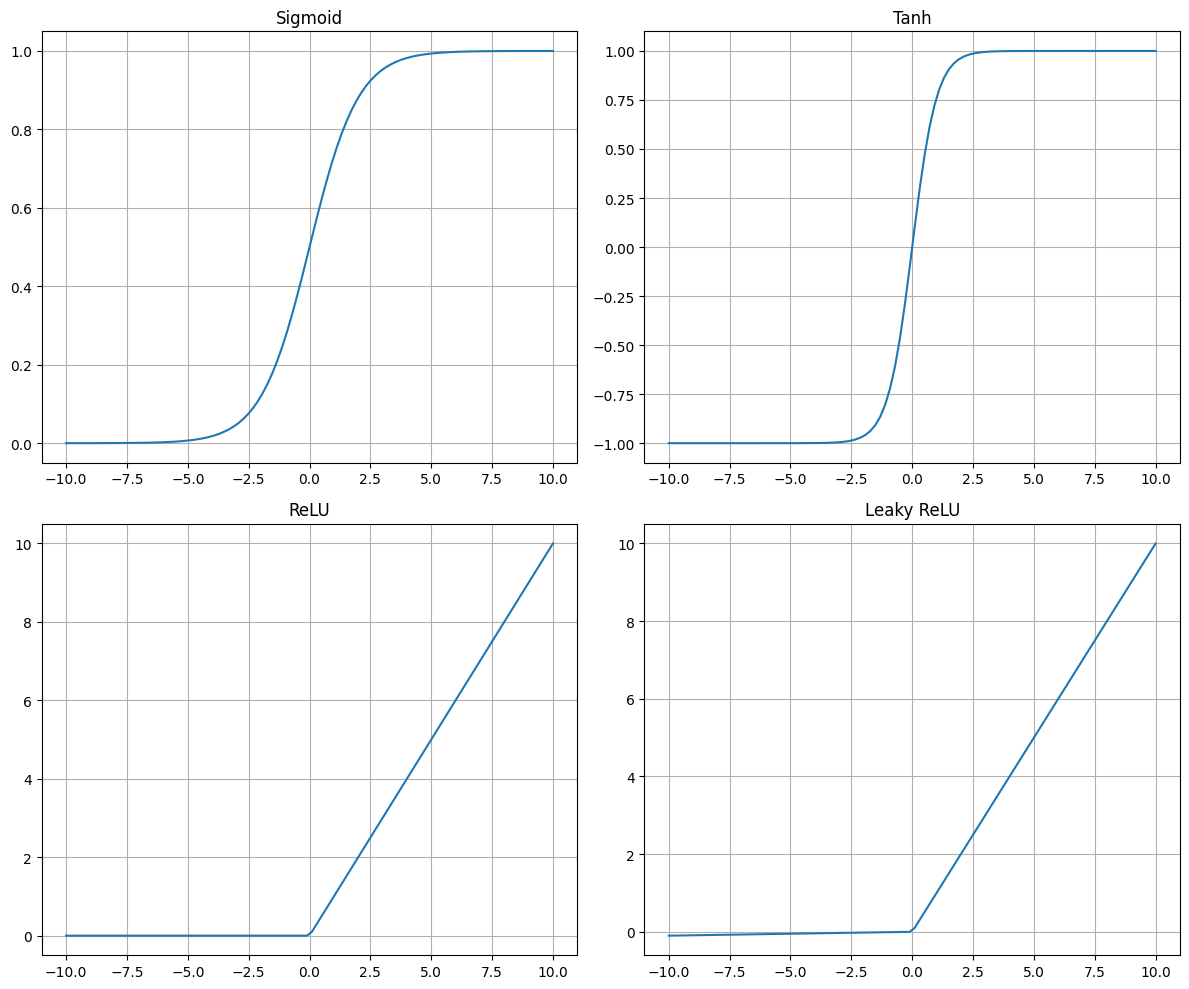

Softmax gjør om en vektor av tall til sannsynligheter, som f.eks.:
Logits: [2.  1.  0.1 5.  3.  2.5]
Softmax Output: [0.03850599 0.01416556 0.00575929 0.77341341 0.10467012 0.06348564]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definer aktiveringsfunksjonene som er diskutert
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

# Opprett x-verdiene for plottet
x = np.linspace(-10, 10, 100)

# Plott funksjonene i subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rader, 2 kolonner

# Sigmoid plot
axes[0, 0].plot(x, sigmoid(x))
axes[0, 0].set_title("Sigmoid")
axes[0, 0].grid(True)

# Tanh plot
axes[0, 1].plot(x, tanh(x))
axes[0, 1].set_title("Tanh")
axes[0, 1].grid(True)

# ReLU plot
axes[1, 0].plot(x, relu(x))
axes[1, 0].set_title("ReLU")
axes[1, 0].grid(True)

# Leaky ReLU plot
axes[1, 1].plot(x, leaky_relu(x))
axes[1, 1].set_title("Leaky ReLU")
axes[1, 1].grid(True)

# Juster layout
plt.tight_layout()
plt.show()

logits = np.array([2.0, 1.0, 0.1, 5.0, 3.0, 2.5])
softmax_output = softmax(logits)
print('Softmax gjør om en vektor av tall til sannsynligheter, som f.eks.:')
print("Logits:", logits)
print("Softmax Output:", softmax_output)

## **Loss funksjon**

Loss-funksjoner er en sentral del av nevrale nettverk fordi de måler hvor godt eller dårlig en modell presterer. I treningsprosessen bruker nevrale nettverk en loss-funksjon til å evaluere avstanden mellom modellens prediksjoner og de faktiske verdiene i datasettet. Målet er å minimere denne avstanden ved å justere modellens parametere (vekter og biaser) gjennom en prosess som ofte innebærer gradient descent.

### Ulike typer loss funksjoner
1. **MSE (mean squared error)**
* Vanlig i regresjonsproblemer.
* Beregnes som gjennomsnittet av kvadratet av differansen mellom predikerte og faktiske verdier.
* Formel: $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
* Fordel: Enkelt og gir større straff for store feil.
* Ulempe: Sensitiv for outliers på grunn av kvadreringen.


2.  **Cross-Entropy Loss**
* Brukes ofte i klassifikasjonsproblemer, spesielt for binære og multiklassemodeller.
* For binær klassifikasjon: $\text{Loss} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$
* For multiklasse klassifikasjon brukes "categorical cross-entropy", som generaliserer formelen.
* Fordel: Effektiv for å håndtere sannsynligheter og klassifiseringsproblemer.
* Ulempe: Kan føre til ustabil trening hvis sannsynlighetene er nær $0$ eller $1$.

3. **Hinge Loss**
* Brukes i støttevektormaskiner (SVM) og noen ganger i klassifikasjonsnevrale nettverk.
* Fokusert på marginbaserte klassifikasjoner.
* Formel for binær klassifikasjon: $\text{Loss} = \max(0, 1 - y \cdot \hat{y})$
* Fordel: Optimal for marginbaserte problemer.
* Ulempe: Mindre brukt i nevrale nettverk, men relevant for SVM.

4. **Huber Loss**
* Kombinerer fordelene til både MSE og MAE (Mean Absolute Error).
* Brukes i situasjoner hvor du ønsker å være robust mot uteliggere.
* Gir kvadratisk straff for små feil og lineær straff for store feil.
* Formel: Definert med en terskel $δ$ som bestemmer når overgangen fra kvadratisk til lineær skjer.
---
#### **Valg av loss-funksjon**

Valget av loss-funksjon avhenger av *problemtypen*:

- Regresjon: MSE eller Huber Loss.
- Binær klassifikasjon: Binær cross-entropy.
- Multiklasse klassifikasjon: Kategorisk cross-entropy.
- Loss-funksjonen styrer treningsprosessen, og riktig valg er avgjørende for å oppnå god modellprestasjon. I praksis vil optimal loss-funksjon ofte bestemmes gjennom eksperimentering og forståelse av dataenes karakteristika.
- Det finnes mange flere - og igjen, alt avhenger av data/problemet.

Her er en liten oversikt over potensielle loss-funksjoner til regresjon eller klassifikasjon.

| Type       | Loss funksjon                    |
|---------------------|----------------------------------|
| **Regresjon**      | Mean Squared Error (MSE)          |
|                     | Mean Absolute Error (MAE)        |
|                     | Huber Loss                       |
| **Klassifisering**  | Binary Cross-Entropy (Log Loss)  |
|                     | Categorical Cross-Entropy        |
|                     | Hinge Loss                       |
|                     | Kullback-Leibler Divergence      |

## **Kjernen av maskinlæring**
Mye av maskinlæring handler om å minimere en loss-funksjon. Det gjør vi gjennom *treningsprosessen* av nettverket. Denne optimiseringen skjer gjennom algoritmer som vi kaller for **optimiseringsalgoritmer** (eng: optimization algorithms).

Noen eksempler på optimeringsfunksjoner er:
* Stochastic Gradient Descent
* ADAM

For å forstå disse trenger vi en grunleggende forståelse av kalkulus (derivasjon, optimum/minimum), og dette vil vi gå nærmere inn på i neste forelesning.


# **Eksempel på et nevralt nettverk ved bruk av TensorFlow**

Her vil vi bruke [begynner tips](https://www.tensorflow.org/tutorials/quickstart/beginner) fra TensorFlow.

## Sette opp TensorFlow riktig

Importerer tensorflow for å kunne bygge nettverket.

In [ ]:
import tensorflow as tf
print("TensorFlow versjon:", tf.__version__)

TensorFlow version: 2.17.1


## Laste inn dataset
MNIST står for *Modified National Institute of Standards and Technology* dataset og er et av de mest kjente og brukte datasettene innen maskinlæring og datavitenskap. MNIST-datasetet består av håndskrevne sifre og brukes ofte til å teste og evaluere bildeklassifiseringsalgoritmer og nevrale nettverk.

Beskrivelse av MNIST
1. **Innhold:**
Bilder: Datasetet inneholder $70\; 000$ gråskala-bilder av håndskrevne sifre fra $0$ til $9$.
Treningssett: $60 \; 000$ bilder.
Testsett: $10\; 000$ bilder.
Oppløsning: Hvert bilde er $28$ x $28$ piksler.
Datatype: Hvert bilde er representert som en rank 2-tensor (matrise), med $784$ elementer ($28$ x $28$), hvor hver verdi er en intensitet fra $0$ (svart) til $255$ (hvit).
2. **Etiketter:**
Hvert bilde er merket med den tilhørende sifre fra $0$ til $9$, som gir datasetet en klassifikasjonsstruktur med $10$ klasser.


In [ ]:
# Her laster vi inn mnist datasettet
mnist = tf.keras.datasets.mnist

# Datasettet er delt i trening og test sett, og vi deler det opp her
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Ettersom verdiene er 2^8 ulike verdier, må vi dele på 255.0 for å normalisere.
x_train, x_test = x_train / 255.0, x_test / 255.0

## **La oss visualisere dataen**

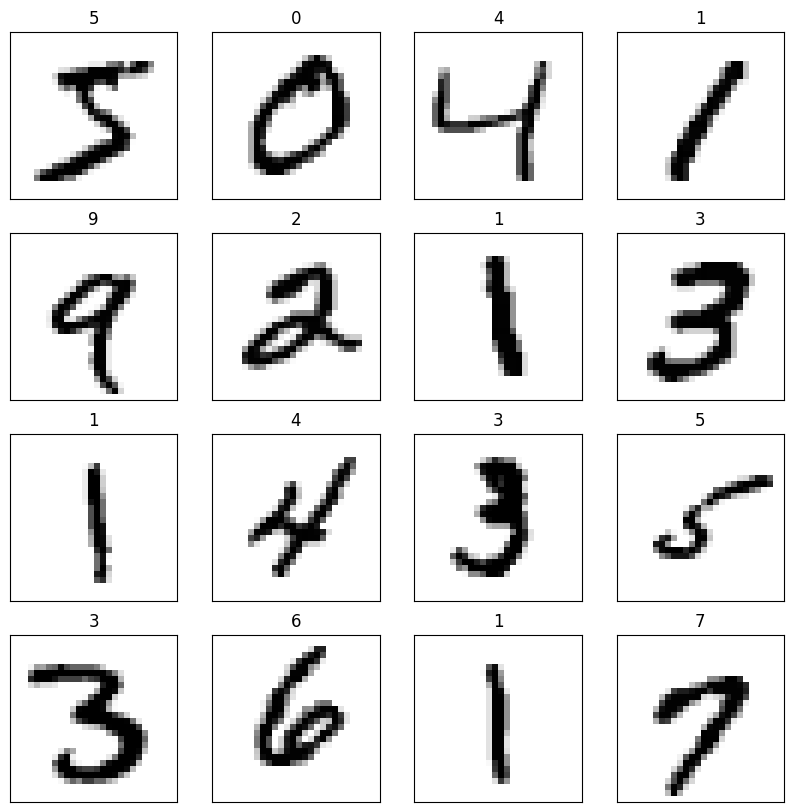

In [ ]:
import matplotlib.pyplot as plt

# Funksjon for å visualisere datasettet
def plot_mnist_images(images, labels, num_images):
    plt.figure(figsize=(10,10))
    for i in range(num_images):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)  # Hvis bilde i binær (svart/hvit), alt. 'gray'
        plt.title(labels[i])
    plt.show()

# Plotter de første 16 bildene av treningssettet
plot_mnist_images(x_train, y_train, 16)

## La oss inspisere datasettet

In [ ]:
# Starter med å se på hvilken type data vi har
def check_type(x_train, x_test, y_train, y_test):
  print(type(x_train))
  print(type(x_test))
  print(type(y_train))
  print(type(y_test))

check_type(x_train, x_test, y_train, y_test)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# La oss se på shape til de ulike dataene
def check_shape(x_train, x_test, y_train, y_test):
  print(x_train.shape)
  print(x_test.shape)
  print(y_train.shape)
  print(y_test.shape)

check_shape(x_train, x_test, y_train, y_test)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
# Sjekker det første elementet i treningsdataen
print(x_train[:1])
print(y_train[:1])

print(x_train[:1].shape)
print(x_train[0].shape)

# Hvorfor gir det mening at dette er et svart hvitt bilde?
# Hvorfor er det svart og hvitt?

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
  

## La oss bygge vår maskinlæringsmodell
Nå vil vi bruke *Sequential* API'et fra *keras* til TensorFlow! Da vil vi bruke "tf.keras.models.Sequential".

In [ ]:
'''
  Definerer en sekvensiell modell ved hjelp av TensorFlow's Keras API.

  Input-lag: Spesifiserer at modellen mottar inndata i form av bilder med dimensjonene 28x28 piksler.

  Flatten-lag: Konverterer 2D-inndata (28x28 piksler) til en 1D-vektor med 784 elementer
  (28 * 28 = 784). Dette er nødvendig fordi Dense-lag krever 1D-input data.

  Dense-lag: Et fullt tilkoblet lag med 16 nevroner. Hvert nevron er koblet til alle
  nevronene i det forrige laget, og hver forbindelse har sin egen vekt. Nevronene bruker
  sigmoid som aktiveringsfunksjon, noe som gir en output mellom 0 og 1.

  Dense-lag: Et nytt fullt tilkoblet lag med 16 nevroner, igjen med sigmoid som aktiveringsfunksjon.

  Output-lag: Et fullt tilkoblet lag med 10 nevroner, ett for hver klasse (sifrene 0-9).
  Dette laget gir de endelige klassifiseringsverdiene. Siden aktiveringsfunksjonen ikke er
  spesifisert, brukes lineær aktivering som standard. Men som vi vil se, så definerer vi det senere i koden - da det er 'best practice'.
'''

# Eksempel som er likt det vi går igjennom på tavla
model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(28, 28)),                   # Input lag - bilde som er 28 x 28 piksler
  tf.keras.layers.Flatten(),                        # "Flate ut" laget fra en 2D array (28, 28) til en vektor (784, )
  tf.keras.layers.Dense(16, activation='sigmoid'),  # Dense - betyr at alle nevroner er i laget 'connecta' til alle nevronene i det forrige laget.
                                                    # hvert nevron har også sin egen bias 'b', altså 16 her
  tf.keras.layers.Dense(16, activation='sigmoid'),
  tf.keras.layers.Dense(10)                         # Fully-connected lag til output (0-9, altså 10 ulike klasser)
])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

![3blue1brown](https://3b1b-posts.us-east-1.linodeobjects.com/content/lessons/2017/neural-networks/confused-output-question.png)

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) er nyttig for å stable lag der hvert lag har ett inngangstensor og ett utgangstensor. Les mer om de andre komponentene på [`Tensorflow's nettside`](https://www.tensorflow.org/).

For hvert eksempel returnerer modellen en vektor med det som kalles *logits*, én for hver klasse. Som i dette tilfelle betyr, én for tallet $0$, én for tallet $1$, ..., én for tallet $9$.

## Hvorfor er output'et logits her?
I TensorFlow/Keras, som er brukt over, hvis ingen aktiveringsfunksjon er satt i et ```Dense```-lag, så er default'en å bruke en lineær aktiveringsfunksjon. Dette betyr at output'et blir en verdi (logits) for hver klasse (tallene 0-9), med verdier fra $-∞$ til $∞$.

## **Men hva er logit?**

### Logit-funksjon: Logit-funksjonen er en matematisk funksjon som brukes til å konvertere sannsynligheter til log-odds. Den er definert som:
$$\text{logit}(p) = \log \left( \frac{p}{1 - p} \right)
$$
hvor $p$ er sannsynligheten.

I maskinlæring, spesielt i klassifikasjonsoppgaver, refererer logits til de rå utgangsverdiene som produseres av et nevralt nettverks siste lag (før noen aktiveringsfunksjon som *softmax* eller *sigmoid* blir brukt). De er også kjent som "pre-aktivering" verdier. Disse rå poengene kan være hvilken som helst reell verdi, enten positiv eller negativ.

---
I eksempelet over ser vi fra de siste kodelinjene i vårt nevrale nettverk at det siste *skjulte laget* vårt har $16$ verdier mellom $0$ og $1$, mens output laget har ingen aktiveringsfunksjon ---> logit's er outputet.
```python
  tf.keras.layers.Dense(16, activation='sigmoid'),
  tf.keras.layers.Dense(10)
  # På grunn av det "activation"-delen her, er det en lineær sammenheng fra nest siste lag til
  # output-laget, og derav er output i form av logits.
```




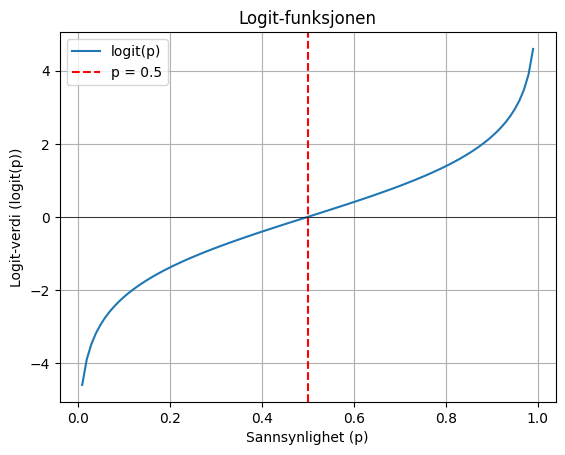

In [ ]:
# Definerer logit-funksjonen
def logit(p):
    return np.log(p / (1 - p))

# Verdier fra 0 til 1 (unntatt 0 og 1 fordi logit er udefinert der)
p = np.linspace(0.01, 0.99, 100)
logit_values = logit(p)

# Plotter logit-funksjonen
plt.plot(p, logit_values, label='logit(p)')
plt.title('Logit-funksjonen')
plt.xlabel('Sannsynlighet (p)')
plt.ylabel('Logit-verdi (logit(p))')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0.5, color='red', linestyle='--', label='p = 0.5')
plt.legend()
plt.show()

## **Tilbake til maskinlæring og tensorflow!**

In [ ]:
# Here we take the first element of the training data. Could be called a batch.
# '.numpy()' converts output from a tensor (which we use in TensorFlow)
# into a NumPy array (easier to manipulate/do operations on).
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.44676924,  0.6873624 , -0.268069  ,  0.46431458,  0.6570015 ,
         0.2937259 , -0.30400422, -0.81314546, -0.8037839 ,  0.25918376]],
      dtype=float32)

#### Hva summerer `predictions` til?

Høyere verdi av disse logits'ene indikerer at modellen er mest "selvsikker" på at det første treningsbilde (x_train[:1]) hører til den klassen (tall mellom $0$ og $9$).

In [ ]:
# For å vise hva 'predictions' inneholder kan vi skrive.
print(type(predictions) )
print(predictions.shape)

# Så kan vi se maksimum og minimum-verdien til 'predictions'
print(predictions.max())
print(predictions.min())

<class 'numpy.ndarray'>
(1, 10)
0.6873624
-0.81314546


Under her bruker vi aktiveringsfunksjonen *softmax* (som nevnt over) for å gjøre om disse logits'ene til sannsynligheter mellom $p$ ($∈[0, 1]$). Som bilde under viser.

![](https://images.contentstack.io/v3/assets/bltac01ee6daa3a1e14/blte5e1674e3883fab3/65ef8ba4039fdd4df8335b7c/img_blog_image1_inline_(2).png?width=3360&disable=upscale&auto=webp)

Bilde: [Towards Data Science](https://towardsdatascience.com/softmax-activation-function-explained-a7e1bc3ad60)

In [ ]:
# Hvordan fungerer softmax?
tf.nn.softmax(predictions).numpy()

array([[0.12916532, 0.16429873, 0.06319688, 0.13145156, 0.15938544,
        0.1108358 , 0.0609662 , 0.03664139, 0.03698602, 0.10707266]],
      dtype=float32)

Merk: Det er mulig å skrive "tf.nn.softmax"-funksjonen direkte i aktiveringsfunksjonen for det siste laget i nettverket (altså inn i 'model'). Selv om dette kan gjøre modellen enda mer direkte for hva den gjør, anbefales ikke denne tilnærmingen da det er umulig å gi en nøyaktig og numerisk stabil beregning av loss (tapet) for alle modeller når man bruker en softmax-aktiveringsfunksjon.

In [ ]:
# Tapsfunksjon - kommer an på problemstillingen. Binær/multi-klasse klassifikasjon eller regresjon?
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

Loss-funksjonen tar en vektor med de sanne verdiene og en vektor med logits, og returnerer et skalar loss for hvert eksempel. Dette loss'et er lik den negative log-sannsynligheten for den riktige klassen: Loss'et er null hvis modellen er sikker på den korrekte klassen. Dette er selve kjernen i maskinlæring, vi ønsker å **minimere enn loss-funksjon!** (ofte brukes *kost-funksjon* også)

Denne utrente modellen gir sannsynligheter nærmest tilfeldig (1/10 for hver klasse).

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.1997056

In [ ]:
'''
# Koden under gjør:
    - Kompilerer modellen med spesifiserte innstillinger
    - Velger Adam som optimaliseringsalgoritme. Adam er en populær algoritme for å oppdatere modellens vekter under trening.
    - Definerer tap-funksjonen som skal brukes til å evaluere modellen. `loss_fn` representerer den spesifikke tap-funksjonen som er
      definert tidligere i koden (f.eks. 'categorical_crossentropy' eller 'mean_squared_error').
    - Definerer hvilke metrikker som skal overvåkes under trening og evaluering. Her overvåkes nøyaktighet ('accuracy')
      for å gi en indikasjon på hvor godt modellen presterer på klassifikasjonsoppgaver.

'''

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'
    ])

## Nå har vi satt opp alt - la oss trene!

Vi bruker `model.fit` for å tilpasse parameterene i modellen, og minimisere loss'et. Det gjøres på følgende vis:

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5785 - loss: 1.6089
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8964 - loss: 0.4608
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9176 - loss: 0.3108
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9288 - loss: 0.2576
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9362 - loss: 0.2287
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9408 - loss: 0.2088
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9445 - loss: 0.1969
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9468 - loss: 0.1859
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9489 - loss: 0.1775
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9510 - loss: 0.1713


### **Men hva er epochs???**
Definisjon: En *epoch* er en full gjennomgang av hele treningsdatasettet en gang. Under en epoch blir alle treningsdata brukt til å beregne tapet (loss) og oppdatere modellens vekter (weights).

In [ ]:
# model.evaluate gir oss informasjon fra Tensorflow Keras.
# verbose = 0: ingen utskrift
# verbose = 1: viser fremdrift av evaluering for hver batch (epoch).
# verbose = 2: viser sammendrag til slutt.
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9473 - loss: 0.1787


[0.17874695360660553, 0.9473000168800354]

### Hva har vi gjennomgått?
* Addisjon og ulike multiplikasjonsvarianter av ulike tensorer.
* Diskutert nevrale nettverk, og dens struktur og komponenter (akt.funk., loss-funk., tensorflow,...).
* Gjennomgått et eksempel av nevralt nettverk.

### Tips
Sjekk ut denne lenken til [3Blue1Brown](https://www.3blue1brown.com/topics/neural-networks)!

### **Neste gang**
I neste forelesning vil vi med å gå enda litt dypere rundt diskusjonen av nevrale nettverk. Vi kommer til å diskutere:
* Optimaliseringsalgoritmer - hva gjør ADAM/SDG?
* Regularisering (hvordan vi kan *straffe* loss-funksjonen for å forindre overfitting, f.eks. gjennom *dropout rates*).
* Tuning av hyperparametere (hvordan velger vi learning rate, batch size, antall lag og nevroner,  osv.)
* Effekten av pre-prosessering og valg av relevante features.

# Oppgaver
Det er mye stoff vi har gått igjennom til nå, og noe av det viktigste vil være å ha en forståelse av hva det er vi gjør her.

Gå igjennom koden, og særlig se over hvordan `model` er lagt opp ved hjelp av det sekvensielle API'et til Keras.

## Andre tips
Jeg anbefaler på det varmeste å se YouTube serien til 3Blue1Brown om dette tema. Link til den er [her](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi).

Kompendiet forklarer flere av konseptene i dybden, og er nyttig støtte-litteratur til disse forelesningene.